Ana denklem

y = w1.x1 + w2.x2 + b.1
* x: İnput
* w: Weight
* b: Bias
* y: Output


Gerekli kütüphaneleri ekleme

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Ana denklem doğrusunu çizen fonksiyon

In [15]:
def ciz(x1, x2):
    cizgi = plt.plot(x1, x2)

Sigmoid hata değerinin hesaplanması

In [21]:
def sigmoid(skor):
    return 1 / (1 + np.exp(-skor))

Değişkenler matriksinin oluşturulması

y1 = | x1, x2, 1 |

In [11]:
# Nokta sayısı tanımlama
n_nokta = 7

# Noktarları oluşturma

# Her defasında aynı rastgele değerlerin atanamasını sağlar. 
# İnceleme işlemi için aynı değerler lazım
np.random.seed(0)

# x1 için dikey ters parabol oluşturma
rx1_ust = np.random.normal(10, 2, n_nokta)
rx1_alt = np.random.normal(5, 2, n_nokta)

# x2 için yatay ters parabol oluşturma
rx2_ust = np.random.normal(12, 2, n_nokta)
rx2_alt = np.random.normal(6, 2, n_nokta)

# Sabit değerin katsayısını oluşturma
bias = np.ones(n_nokta)

# İlk satır x, ikinci satır y verisi olur ([x,x], [y,y]). Matrix işlemleri yapmak için bize 
# ([x,y], [x, y]) tipinde veri lazım bu sebeple transpozunu alıyoruz.
ust_bolge = np.array([rx1_ust, rx2_ust, bias]).T
alt_bolge = np.array([rx1_alt, rx2_alt, bias]).T

# Vektorel olarak ekleme işlemi
y1 = np.vstack((ust_bolge, alt_bolge))

Katsayılar matriksinin oluşturulması

y2 = |w1| |w2| |b |

In [4]:
# Başlangıç değerleri (rastgeledir)
w1 = -0.2
w2 = -0.35
b = 3

# Matrix çarpımı yapmak için x1, x2, ve sabit verilerinin katsayıları
# Transpozunu almalıyız çünkü yatay veri ile dikey veri çarpılır
y2 = np.matrix([w1, w2, b]).T

# Çizginin başlangıç ve bitiş noktaları

# Sağ alt köşenin bulunması
p1 = np.array([alt_bolge[:, 0].min(), ust_bolge[:, 0].max()])
# Denklemde yer değiştirerek ikinci noktanın bulunması
p2 = - b / w2 + p1 * (-w1 / w2)

Ana denklemi matriks çarpımı ile bulma

y = y1 * y2

In [23]:
# Çizginin sağında kalanlar negatif, solunda kalanlar pozitiftir
y = y1 * y2

# Hata fonksiyonu ile olasılığı hesaplama
olasiliklar = sigmoid(y)
olasiliklar

matrix([[0.01453828],
        [0.02676228],
        [0.00959045],
        [0.01884013],
        [0.01527461],
        [0.09874728],
        [0.14271234],
        [0.37824826],
        [0.33988252],
        [0.5634747 ],
        [0.14849606],
        [0.58330279],
        [0.39258813],
        [0.49558979]])

Koordinat sistemine noktaların eklenmesi ve sistemin ekrana çizilmesi

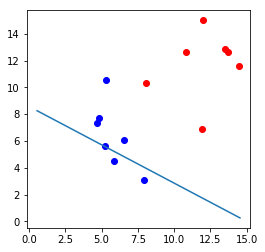

In [13]:
# Koordinat sistemi parçası oluşturma
# figsize (keyword): x,y uzunlukları
_, ax = plt.subplots(figsize=(4, 4))

# 0. ve 1. sütundaki her (:) satırı alma ve bu verileri koordinat sisteminde gösterme
ax.scatter(ust_bolge[:, 0], ust_bolge[:, 1], color='r')
ax.scatter(alt_bolge[:, 0], alt_bolge[:, 1], color='b')
ciz(p1, p2)
# Koordinat sistemini gösterme
plt.show()